# 🎓 Lesson: Fixing a Broken Neural Network
**Topic:** Activity 2 Keras, CIFAR-10, and Hyperparameter Tuning

**Objective:** We will build two versions of a neural network to classify images from the CIFAR-10 dataset:
1. **The "Broken" Robot:** A network crippled by bad choices (wrong loss function, poor optimizer, and low epochs).
2. **The "Smart" Robot:** The same data and architecture, but trained with the correct mathematical tools.

**PLEASE READ THE NOTEBOOK AND TRY ANSWERING ON YOUR OWN... **
refer to the https://keras.io/ website for information on optimizers and loss optimizers

acitvity 2 trademark https://www.cit.edu
---

### Step 1: Import Libraries and Load Data
We use **Pandas** to inspect the class distribution and **Matplotlib** to view results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 1. Load the data
print("Loading CIFAR-10 data...")
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. Define Class Names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 3. DATA EXPLORATION VIA PANDAS
df_train = pd.DataFrame(y_train, columns=['Label_Index'])
df_train['Label_Name'] = df_train['Label_Index'].apply(lambda x: class_names[x])

print("\n--- Data Exploration (First 5 rows) ---")
print(df_train.head())

print("\n--- Class Distribution ---")
print(df_train['Label_Name'].value_counts())

Loading CIFAR-10 data...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 46s 0us/step


c:\Nemeno\3rd year\2nd sem\IS2\.venv\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")



--- Data Exploration (First 5 rows) ---
   Label_Index  Label_Name
0            6        frog
1            9       truck
2            9       truck
3            4        deer
4            1  automobile

--- Class Distribution ---
Label_Name
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64


### Step 2: Preprocessing
We must normalize pixel values (0-1) and One-Hot Encode the labels so the neural network can understand them.

In [2]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, 10)
y_test_one_hot = to_categorical(y_test, 10)

print(f"\nTraining data shape: {x_train.shape}")
print(f"Target label shape (One-Hot): {y_train_one_hot.shape}")


Training data shape: (50000, 32, 32, 3)
Target label shape (One-Hot): (50000, 10)


### Step 3: The "Broken" Model (High Loss Scenario)
We will intentionally introduce three specific errors:
1. **Bad Optimization:** `SGD` without tuning.
2. **Bad Loss Function:** `Mean Squared Error` (MSE). MSE is for regression, not classification.
3. **Low Epochs:** Only 2 epochs.

In [3]:
def build_model():
    # A simple CNN architecture
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax') # Output layer for 10 classes
    ])
    return model

# Initialize the "Broken" Model
bad_model = build_model()

# --- THE MISTAKES ---
bad_model.compile(
    optimizer='adam',                   
    loss='categorical_crossentropy',    
    metrics=['accuracy']
)

print("\n--- Training the 'Broken' Model ---")
# MISTAKE 3: Only 2 epochs
history_bad = bad_model.fit(
    x_train, y_train_one_hot,
    epochs=2,
    validation_data=(x_test, y_test_one_hot),
    verbose=1
)


--- Training the 'Broken' Model ---


c:\Nemeno\3rd year\2nd sem\IS2\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4608 - loss: 1.4935 - val_accuracy: 0.5769 - val_loss: 1.2091
Epoch 2/2
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6077 - loss: 1.1188 - val_accuracy: 0.6129 - val_loss: 1.1049


### Step 4: The "Student Fix" (Minimal Loss Scenario)
Now we fix the hyperparameters while keeping the **same architecture**.
1. **Better Optimizer:** 'find a better optimizer'.
2. **Correct Loss:** `find a better loss function to calculate`.
3. **Epochs:** 'not to much, not too little.

In [22]:
# Initialize a fresh model (Same architecture)
good_model = build_model()

# --- THE FIXES ---
good_model.compile(
    optimizer='adamw',# FIX 1:
    loss='categorical_crossentropy',    # FIX 2:
    metrics=['accuracy']
)

print("\n--- Training the 'Fixed' Model ---")
# FIX 3: More epochs
history_good = good_model.fit(
    x_train, y_train_one_hot,
    epochs=7,
    validation_data=(x_test, y_test_one_hot),
    verbose=1
)


--- Training the 'Fixed' Model ---
Epoch 1/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4713 - loss: 1.4675 - val_accuracy: 0.5783 - val_loss: 1.1992
Epoch 2/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6067 - loss: 1.1264 - val_accuracy: 0.6339 - val_loss: 1.0631
Epoch 3/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6549 - loss: 0.9944 - val_accuracy: 0.6554 - val_loss: 0.9890
Epoch 4/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6854 - loss: 0.9125 - val_accuracy: 0.6656 - val_loss: 0.9571
Epoch 5/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7089 - loss: 0.8438 - val_accuracy: 0.6774 - val_loss: 0.9344
Epoch 6/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7302 - loss: 0.7828 - val_accuracy: 0.6966 - val_loss: 0.8905
Epoch 7/7
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7447 - loss: 0.7396 - val_accuracy: 0.6995 - val_loss: 0.9005


### Step 5: Visualization and Comparison
We use **Matplotlib** to compare the Loss and Accuracy curves of both models. Post your best results on the teams assignment notebook (post the image directly and not as an attachement)


--- Visualizing the Improvement ---


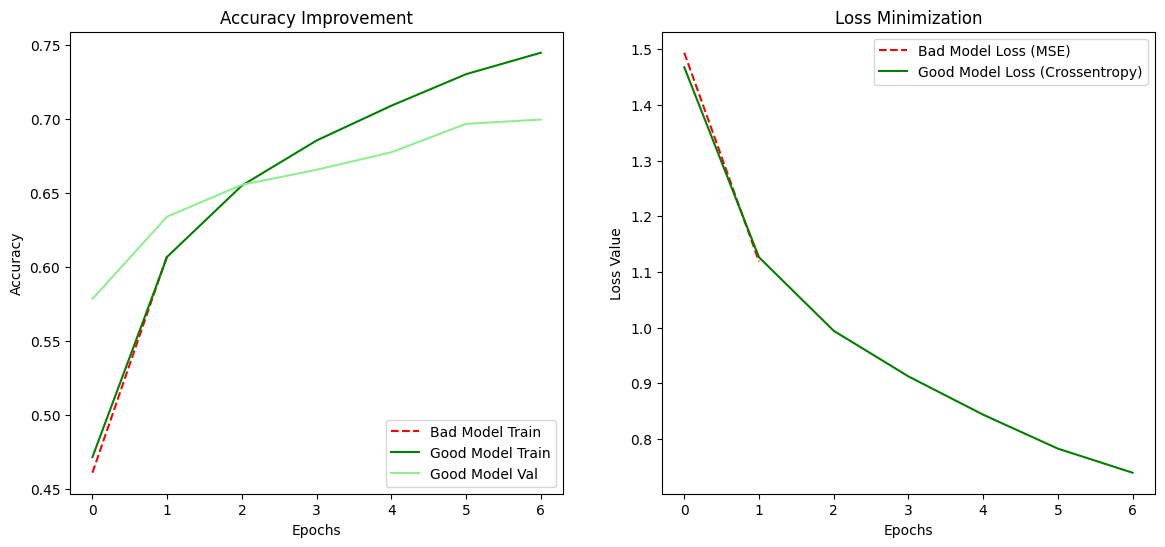

In [23]:
def plot_results(history_bad, history_good):
    acc_bad = history_bad.history['accuracy']
    val_acc_bad = history_bad.history['val_accuracy']
    loss_bad = history_bad.history['loss']
    val_loss_bad = history_bad.history['val_loss']

    acc_good = history_good.history['accuracy']
    val_acc_good = history_good.history['val_accuracy']
    loss_good = history_good.history['loss']
    val_loss_good = history_good.history['val_loss']

    epochs_range_bad = range(len(acc_bad))
    epochs_range_good = range(len(acc_good))

    plt.figure(figsize=(14, 6))

    # Plot 1: Accuracy Comparison
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range_bad, acc_bad, label='Bad Model Train', linestyle='--', color='red')
    plt.plot(epochs_range_good, acc_good, label='Good Model Train', color='green')
    plt.plot(epochs_range_good, val_acc_good, label='Good Model Val', color='lightgreen')
    plt.legend(loc='lower right')
    plt.title('Accuracy Improvement')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    # Plot 2: Loss Comparison
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range_bad, loss_bad, label='Bad Model Loss (MSE)', linestyle='--', color='red')
    plt.plot(epochs_range_good, loss_good, label='Good Model Loss (Crossentropy)', color='green')
    plt.legend(loc='upper right')
    plt.title('Loss Minimization')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')

    plt.show()

print("\n--- Visualizing the Improvement ---")
plot_results(history_bad, history_good)